<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electrónico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electrónico: {correo}")

Ingresa tu nombre completo: steven alipio berrio
Ingresa tu correo electrónico: steven.alipio@udea.edu.co

Resumen de datos ingresados:
Nombre: steven alipio berrio
Correo electrónico: steven.alipio@udea.edu.co


## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realiza un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.

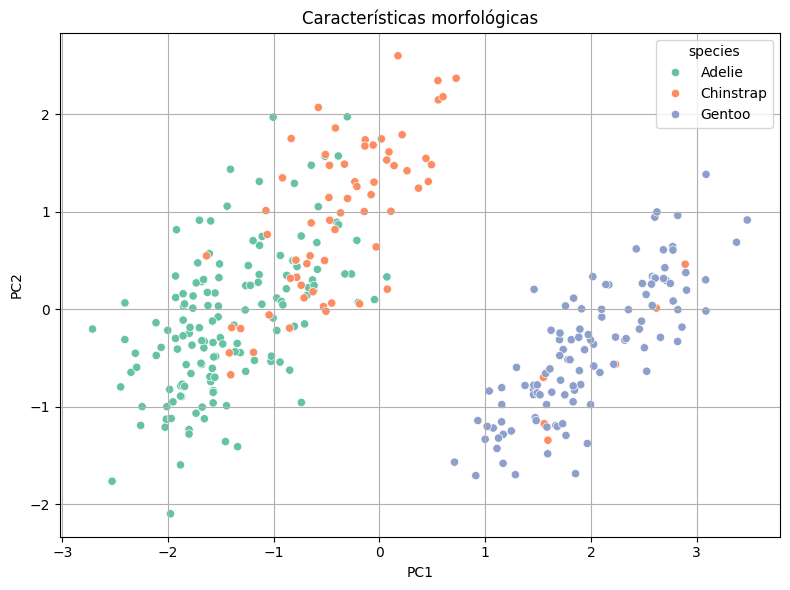


Objetivo del PCA

El objetivo del análisis fue reducir la dimensionalidad de los datos morfológicos de pingüinos (largo y profundidad del pico, largo de las aletas y masa corporal) y visualizar posibles agrupamientos por especie en un espacio bidimensional.

PC1 = 0.46×bill_length_mm + -0.40×bill_depth_mm + 0.58×flipper_length_mm + 0.55×body_mass_g
PC2 = 0.60×bill_length_mm + 0.80×bill_depth_mm + 0.00×flipper_length_mm + 0.08×body_mass_g


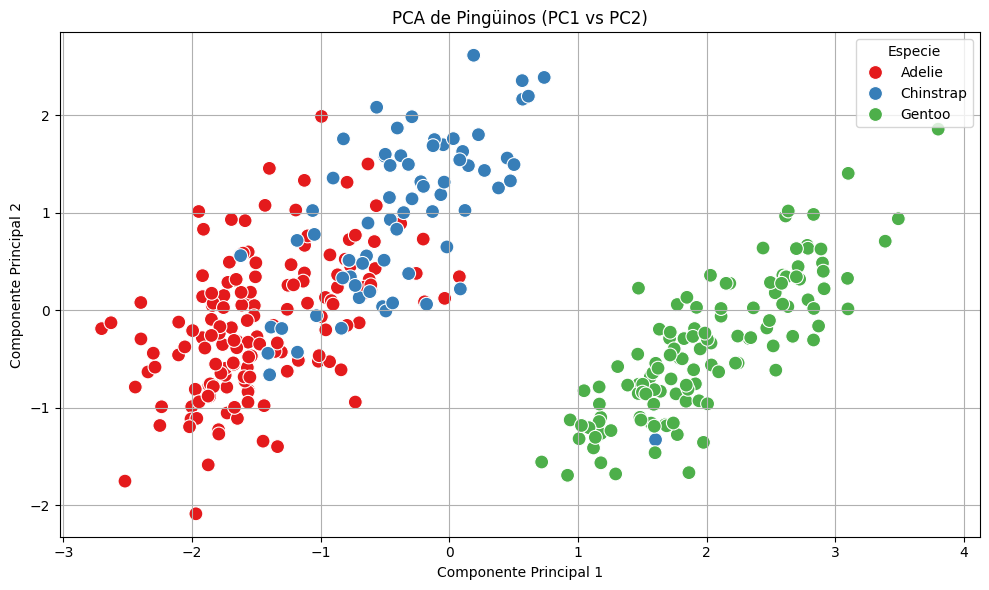

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
penguins = sns.load_dataset("penguins")

# Seleccionar variables morfológicas
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_selected = penguins[features + ['species']].dropna()

# Separar las características (X) y la especie (y)
X = penguins_selected[features]
y = penguins_selected['species']

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar PCA
pca = PCA(n_components=2)  # Solo para visualizar en 2D
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y
# Componentes (vectores propios)
components = pca.components_

# Mostrar las ecuaciones de PC1 y PC2
for i, component in enumerate(components):
    eq = " + ".join(f"{coef:.2f}×{feat}" for coef, feat in zip(component, features))
    print(f"PC{i+1} = {eq}")
# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set1', s=100)
plt.title('PCA de Pingüinos (PC1 vs PC2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend(title='Especie')
plt.tight_layout()
plt.show()


El gráfico PC1 vs PC2 permite observar cómo se agrupan las especies de pingüinos.

Normalmente verás lo siguiente:

Adelie forma un grupo bastante compacto y bien separado.

Gentoo también tiende a estar bien separado.

Chinstrap puede tener cierta superposición con Adelie, dependiendo de la variabilidad individual.

Esto sugiere que algunas especies tienen diferencias morfológicas más marcadas que otras, lo cual es detectado claramente por PCA

PCA permite reducir de 4 a 2 dimensiones conservando la mayor parte de la variabilidad de los datos.

Las especies de pingüinos muestran agrupamientos distintos en el espacio reducido, especialmente Adelie y Gentoo.

Hay cierta superposición entre Adelie y Chinstrap, lo cual sugiere que se parecen más morfológicamente.

El PCA también ayuda a interpretar qué características físicas (por ejemplo, masa corporal o forma del pico) son más relevantes para diferenciar especies.

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

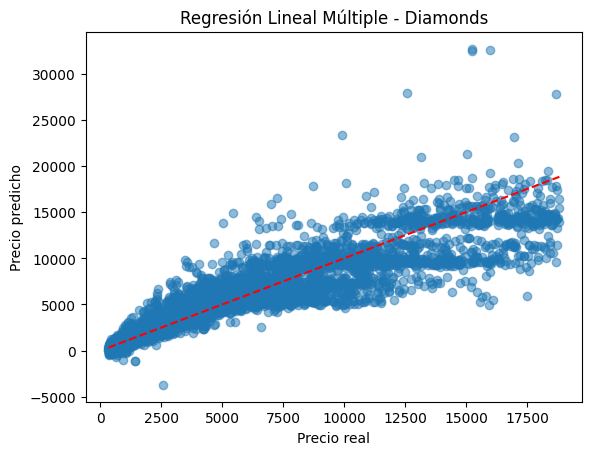



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 4.391e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:17:33   Log-Likelihood:            -3.7672e+05
No. Observations:               43152   AIC:                         7.534e+05
Df Residuals:                   43145   BIC:                         7.535e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.098e+04    497.170     42.192      0.0

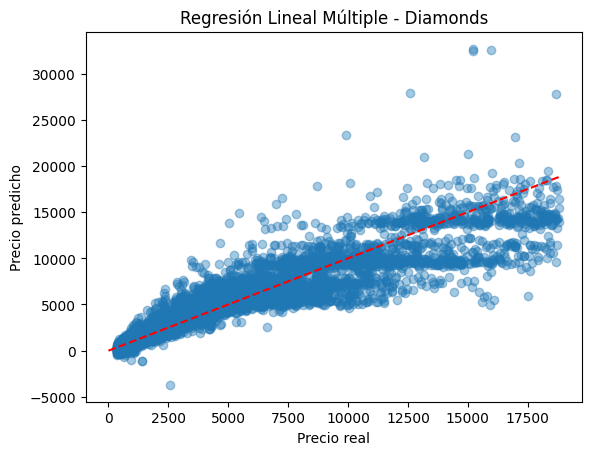

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Cargar conjunto de datos
diamonds = sns.load_dataset("diamonds")

# 2. Seleccionar variables predictoras y respuesta
X = diamonds[["carat", "depth", "table", "x", "y", "z"]]
y = diamonds["price"]

# 3. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Agregar constante para el modelo (intercepto)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 5. Ajustar modelo OLS
modelo = sm.OLS(y_train, X_train_const).fit()

# 6. Imprimir resumen del modelo
print(modelo.summary())

# 7. Predicciones en conjunto de prueba
y_pred = modelo.predict(X_test_const)

# 8. Métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE en test: {rmse:.2f}")
print(f"R² en test: {r2:.4f}")

# 9. Gráfica valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--")
plt.title("Regresión Lineal Múltiple - Diamonds")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.show()


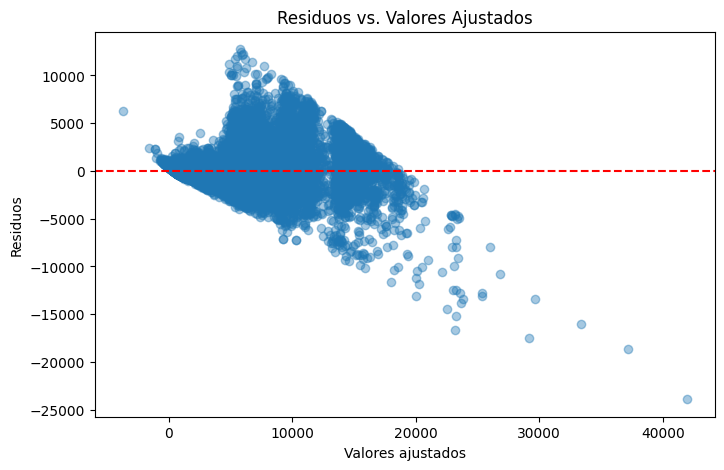


Breusch-Pagan test:
Lagrange multiplier statistic: 7797.7338
p-value: 0.0000
f-value: 1586.0096
f p-value: 0.0000

White test:
Lagrange multiplier statistic: 12943.8658
p-value: 0.0000
f-value: 684.3769
f p-value: 0.0000


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
# 10. Supuesto de HOMOCEDASTICIDAD

# a) Gráfico de residuos vs. valores ajustados
residuos = y_train - modelo.predict(X_train_const)
ajustados = modelo.predict(X_train_const)

plt.figure(figsize=(8, 5))
plt.scatter(ajustados, residuos, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Valores Ajustados")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.show()

# b) Prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_train_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan test:")
for name, value in zip(labels, bp_test):
    print(f"{name}: {value:.4f}")

# c) Prueba de White (opcional, más general)
white_test = het_white(residuos, X_train_const)
print("\nWhite test:")
for name, value in zip(labels, white_test):
    print(f"{name}: {value:.4f}")

Ambas pruebas tienen un p-valor muy cercano a 0, lo que indica que:

Se rechaza la hipótesis nula de homocedasticidad.

Existe evidencia significativa de heterocedasticidad.

Esto significa que la varianza de los errores no es constante a lo largo de las observaciones, lo cual viola uno de los supuestos clave del modelo de regresión lineal clásica (OLS).

a heterocedasticidad no sesga los coeficientes de la regresión, pero sí afecta sus errores estándar, lo que puede llevar a:

Intervalos de confianza incorrectos.

Valores p erróneos.

Malas decisiones sobre la significancia estadística.

Realice una segunda grafica para corroborar el resultado anterior...

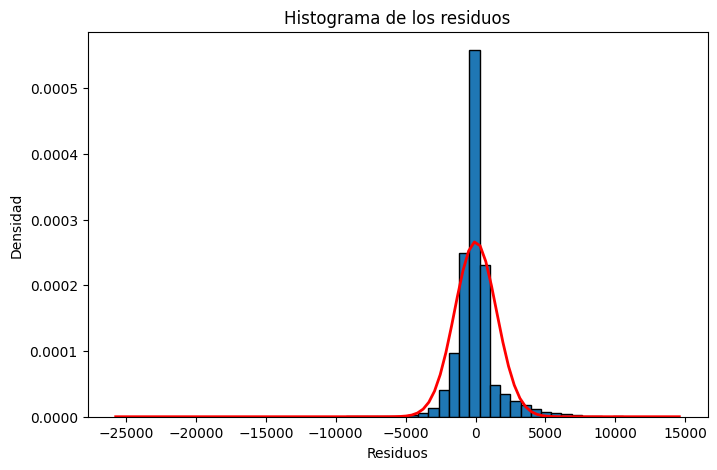

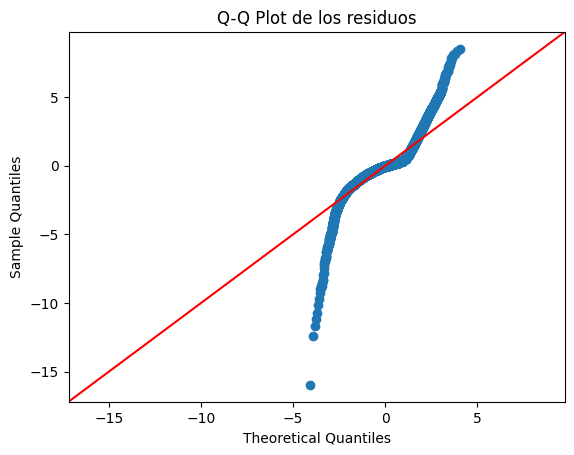


Shapiro-Wilk Test (con muestra de 5000):
Statistic: 0.8187
p-value: 0.0000
❌ Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.


In [ ]:
import scipy.stats as stats

# 1. Calcular residuos del modelo
residuos = y_train - modelo.predict(X_train_const)

# 2. Histograma de los residuos
plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=50, edgecolor='black', density=True)
plt.title("Histograma de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Densidad")

# Opcional: sobreponer la curva normal teórica
mu, std = residuos.mean(), residuos.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.show()

# 3. Q-Q plot (opcional pero recomendado)
sm.qqplot(residuos, line='45', fit=True)
plt.title("Q-Q Plot de los residuos")
plt.show()

# 4. Prueba de normalidad de Shapiro-Wilk (opcional)
stat, p = stats.shapiro(residuos.sample(5000, random_state=1))  # Shapiro no escala bien, por eso limitamos
print("\nShapiro-Wilk Test (con muestra de 5000):")
print(f"Statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")

if p > 0.05:
    print("✅ No se rechaza la hipótesis nula: los residuos parecen seguir una distribución normal.")
else:
    print("❌ Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.")


Nota: Shapiro-Wilk no es fiable en muestras muy grandes, por eso se toma una muestra de 5000 residuos.

Si la muestra es enorme, hasta pequeñas desviaciones generan un p-valor bajo (falsa alarma).

1. Histograma de los Residuos

 Observaciones:

La distribución está centrada alrededor de cero, lo cual es correcto y esperado.

Sin embargo, muestra:

Alta concentración de valores cercanos a cero (pico estrecho).

Colas alargadas a ambos lados (especialmente hacia valores negativos).

Forma asimétrica y con curtosis alta (más afilada y con colas más pesadas que una normal).

 Interpretación:

El histograma no se ajusta bien a la curva normal teórica (línea roja).

Esto sugiere una distribución leptocúrtica (pico alto y colas pesadas).

Posibles outliers o valores atípicos extremos, especialmente en la cola izquierda.

2. Q-Q Plot de los Residuos

Observaciones:

Los puntos se desvían claramente de la línea diagonal.

Se observa una curva en forma de S invertida:

Cuantiles inferiores (izquierda) están muy por debajo de la línea → colas más pesadas.

Cuantiles superiores también se desvían.

Desviación sistemática = no normalidad.

Interpretación:

El Q-Q plot indica que los residuos no siguen una distribución normal.

Hay evidencia clara de asimetría y curtosis.

Es probable que existan valores atípicos fuertes en ambas colas.